In [11]:
%load_ext autoreload
%autoreload 2
from fray_benchmark.visualizer.bench_result import *
paper_path = "/home/aoli/repos/fray-paper/figs"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:425: SyntaxWarning: invalid escape sequence '\#'
  ax.set_ylabel('Cumulative \# of Bugs')


,bug_time,trial,Technique,sum


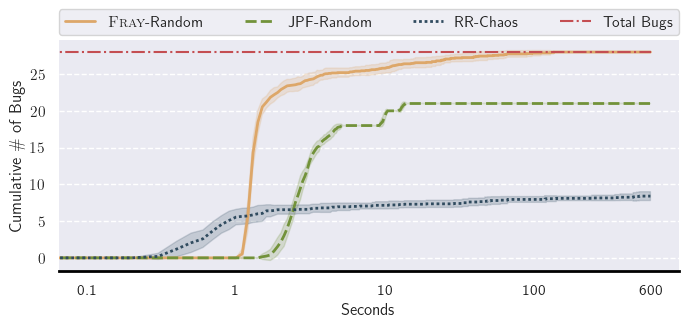

In [14]:
suite = BenchmarkSuite(["/home/aoli/repos/fray-benchmark/output/exec-1/sctbench"])
ax = suite.generate_bug_over_time_fig("time")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/sctbench-time.pdf", bbox_inches='tight')

In [12]:
suite = BenchmarkSuite(["/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe"])
ax = suite.generate_bug_over_time_fig("time")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/jacontebe-time.pdf", bbox_inches='tight')

ValueError: No objects to concatenate

['sctbench-10', 'sctbench-12', 'sctbench-13', 'sctbench-21', 'sctbench-20', 'sctbench-5', 'sctbench-8', 'sctbench-19', 'sctbench-11', 'sctbench-4', 'sctbench-22', 'sctbench-27', 'sctbench-7', 'sctbench-26', 'sctbench-9', 'sctbench-6', 'sctbench-15', 'sctbench-25', 'sctbench-0', 'sctbench-24', 'sctbench-17', 'sctbench-16', 'sctbench-18', 'sctbench-14', 'sctbench-23', 'sctbench-3', 'sctbench-1', 'sctbench-2']
[]


/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:331: UserWarning: The markers list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x="id", y=column, hue="Technique", style="Technique", ax=ax, zorder=2, s=80, alpha=0.9, markers=markers, hue_order=hue_order, style_order=hue_order)


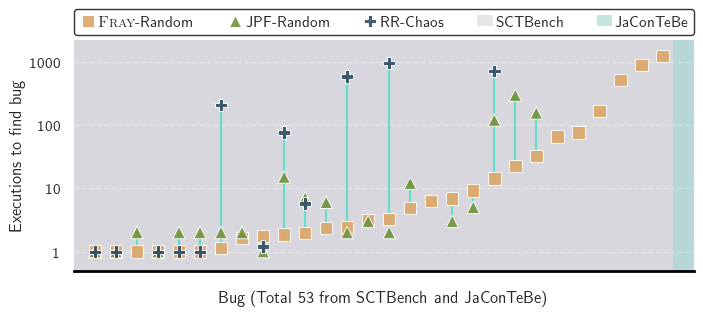

In [18]:
suite = BenchmarkSuite([
    # "/data/output/exec-1/sctbench",
    # "/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe",
    "/home/aoli/repos/fray-benchmark/output/exec-1/sctbench",
    # "/data/output/exec-1/jacontebe",
    ])
ax = suite.generate_search_space_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/searchspace.pdf", bbox_inches='tight')

/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:429: SyntaxWarning: invalid escape sequence '\#'


['sctbench-23', 'sctbench-2', 'sctbench-3', 'sctbench-10', 'sctbench-15', 'sctbench-27', 'sctbench-14', 'sctbench-18', 'sctbench-26', 'sctbench-22', 'sctbench-7', 'sctbench-17', 'sctbench-11', 'sctbench-16', 'sctbench-13', 'sctbench-4', 'sctbench-21', 'sctbench-5', 'sctbench-20', 'sctbench-8', 'sctbench-19', 'sctbench-12', 'sctbench-9', 'sctbench-25', 'sctbench-24', 'sctbench-1', 'sctbench-6', 'sctbench-0']
[]


Technique,$\textsc{Fray}$-Random,JPF-Random,Original,RR-Chaos
id,,,,
0,24.992303,2.907429,91.690900,0.852499
1,25.128028,8.507628,83.681461,0.858249
2,54.261112,18.128752,168.141185,1.198498
3,100.996683,6.271824,294.704641,1.363916
4,134.328767,39.849131,647.468831,1.547831
5,279.831242,44.692333,1012.949908,1.766082
6,281.474067,66.966316,1281.797889,1.718164
7,559.819814,95.360925,1637.167728,1.816832
8,598.926207,65.604997,2041.434772,1.843080


np.float64(3.151708382290563)

np.float64(31.536760940966975)

np.float64(9.991514753686344)

np.float64(441.9227347158668)

Line2D(RR-Chaos)


/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:368: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  pass


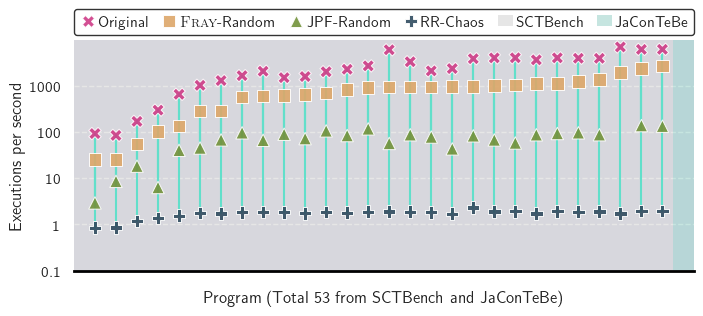

In [26]:
ax = suite.generate_exec_speed_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/execspeed.pdf", bbox_inches='tight')


In [7]:
suite = BenchmarkSuite([
    "/data/output/exec-1/sctbench",
    "/data/output/exec-1/jacontebe",
                        ])
ax = suite.generate_exec_speed_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/execspeed.pdf", bbox_inches='tight')

/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:496: SyntaxWarning: invalid escape sequence '\#'
  ax.set_ylabel('Cumulative \# of Bugs')
/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:496: SyntaxWarning: invalid escape sequence '\#'
  ax.set_ylabel('Cumulative \# of Bugs')


FileNotFoundError: [Errno 2] No such file or directory: '/data/output/exec-1/sctbench'

In [8]:
import pandas as pd

suite = BenchmarkSuite([
    "/home/aoli/repos/fray-benchmark/output/bug-1/guava",
    "/home/aoli/repos/fray-benchmark/output/bug-1/lucene",
    "/home/aoli/repos/fray-benchmark/output/bug-1/kafka",
    ])

df = suite.to_aggregated_dataframe()
df = df[df["error"] == "Error"]

import math
display((df['bug_iter']).mean())

np.float64(81.87305699481865)

In [1]:
suite = BenchmarkSuite(["/home/aoli/repos/fray-benchmark/output/bug-1/kafka"])
for bench in suite.benchmarks:
    bench.to_csv()
    print(bench.path)
    if "/pct3/" in bench.path:
        bench.to_csv()
suite.generate_bug_table()

NameError: name 'BenchmarkSuite' is not defined

In [2]:
suite = BenchmarkSuite(["/usr0/home/aoli/repos/fray-benchmark/output/race-check/guava"])
for bench in suite.benchmarks:
    bench.to_csv()
suite.generate_bug_table()

,Technique,Test Run,Failure,Time (FP)
0,$\textsc{Fray}$-Random,1193,59,135 (0)


In [15]:
import pandas as pd
suite = BenchmarkSuite([
    "/usr0/home/aoli/tmp/output/bug-1/lincheck",
    "/usr0/home/aoli/tmp/output/bug-1/guava",
    "/usr0/home/aoli/tmp/output/bug-1/lucene",
    "/usr0/home/aoli/tmp/output/bug-1/kafka",
    ])

df = suite.to_aggregated_dataframe()
df = df[df["error"] == "Error"]
df = df[df["type"] == "TP"]
df = df[df["Technique"] == "$\\textsc{Fray}$-POS"]
print(df["total_iter"].max())
display(df)


11648


,id,trial,error,type,bug_time,bug_iter,total_time,total_iter,Technique
0,lincheck-0,iter-0,Error,TP,2.13,3,2.13,3,$\textsc{Fray}$-POS
1,lincheck-1,iter-0,Error,TP,2.20,3,2.20,3,$\textsc{Fray}$-POS
2,lincheck-2,iter-0,Error,TP,1.90,1,1.90,1,$\textsc{Fray}$-POS
3,lincheck-3,iter-0,Error,TP,0.63,10,0.63,10,$\textsc{Fray}$-POS
4,lincheck-4,iter-0,Error,TP,2.12,19,2.12,19,$\textsc{Fray}$-POS
...,...,...,...,...,...,...,...,...,...
12240,kafka-87,iter-1,Error,TP,0.00,3,0.00,3,$\textsc{Fray}$-POS
12243,kafka-9,iter-1,Error,TP,0.00,1,0.00,1,$\textsc{Fray}$-POS
12244,kafka-90,iter-1,Error,TP,0.00,1,0.00,1,$\textsc{Fray}$-POS
12246,kafka-92,iter-1,Error,TP,0.00,1,0.00,1,$\textsc{Fray}$-POS


{'com.google.common.util.concurrent.UninterruptibleFutureTest#runNInterruptsTest', 'com.google.common.util.concurrent.Monitor#awaitNanos', 'com.google.common.util.concurrent.SequentialExecutorTest#testTaskThrowsError', 'com.google.common.util.concurrent.Monitor#enterWhenUninterruptibly', 'com.google.common.util.concurrent.FuturesTest#testScheduleAsync_asyncCallable_cancelledBeforeCallingFunction', 'com.google.common.cache.LocalLoadingCacheTest#testRecursiveComputation', 'com.google.common.collect.Queues#drain', 'com.google.common.util.concurrent.ListenableFutureTester#testCancelledFuture', 'com.google.common.util.concurrent.Monitor#enter', 'com.google.common.util.concurrent.Uninterruptibles#getUninterruptibly', 'com.google.common.util.concurrent.FuturesTest#testWhenAllComplete_asyncResult', 'com.google.common.util.concurrent.Monitor#enterIfInterruptibly', 'com.google.common.util.concurrent.GeneratedMonitorTest#runTest', 'com.google.common.util.concurrent.Monitor#enterInterruptibly', 'c

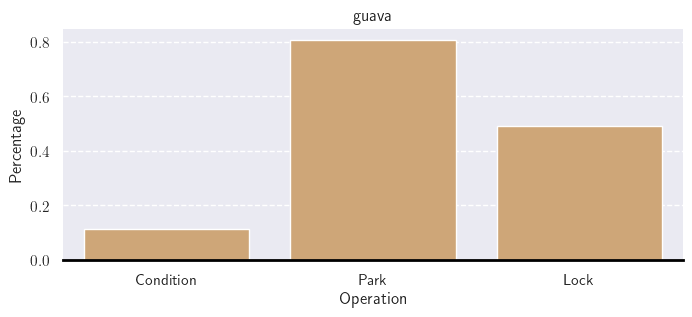

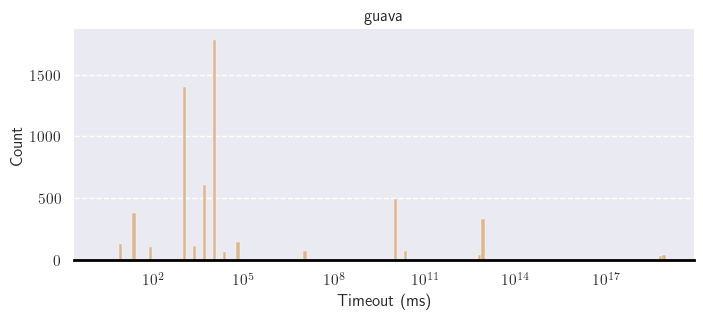

In [9]:
suite = BenchmarkSuite(["/Users/aoli/repos/sfuzz-benchmark/output/stat/guava"])
suite.to_timed_stats()

Condition 84
Park 264


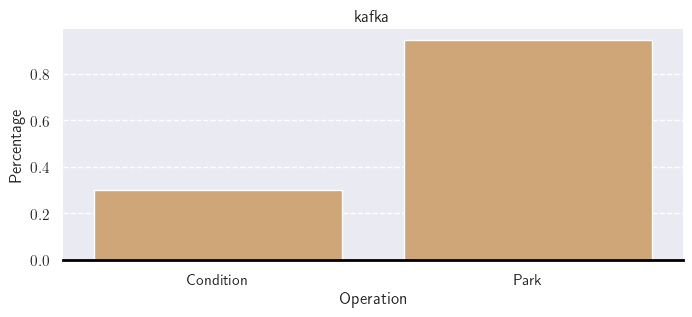

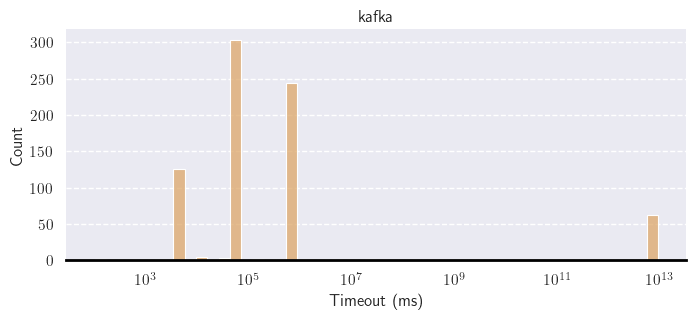

In [5]:
suite = BenchmarkSuite(["/Users/aoli/repos/sfuzz-benchmark/output/stat/kafka"])
suite.to_timed_stats()

Condition 139
Park 941
Lock 592


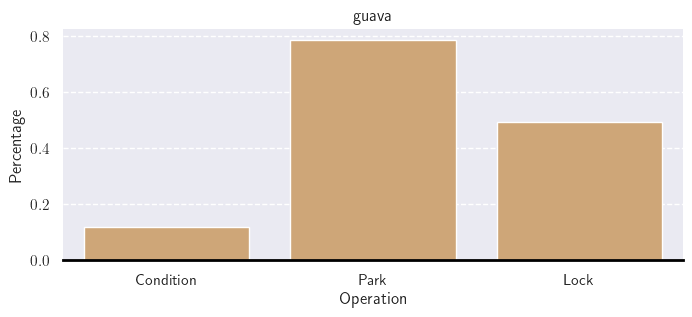

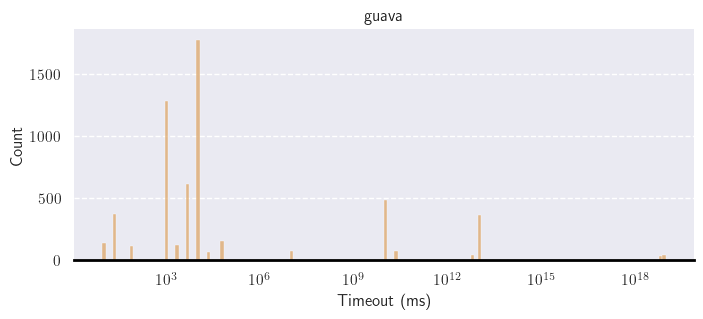

In [6]:
suite = BenchmarkSuite(["/Users/aoli/repos/sfuzz-benchmark/output/stat/guava"])
suite.to_timed_stats()